In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import matplotlib.pyplot as plt

from depynd import markov_networks

% matplotlib inline
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=list(iris.feature_names))
df['target'] = iris.target
X = df.values

In [3]:
adj1 = markov_networks.select(X[:, :4], method='glasso', rep_num=100, verbose=True)

[stars] lambda: 1000000.000000, instability: 0.000000
[stars] lambda: 1.000000, instability: 0.000000
[stars] lambda: 0.900000, instability: 0.044800
[stars] lambda: 0.800000, instability: 0.078533
[stars] lambda: 0.700000, instability: 0.000000
[stars] lambda: 0.600000, instability: 0.000000
[stars] lambda: 0.500000, instability: 0.040133
[stars] lambda: 0.400000, instability: 0.091733
[stars] lambda: 0.300000, instability: 0.069167
[stars] lambda: 0.200000, instability: 0.071300


In [4]:
adj2 = markov_networks.select(X[:, :4], method='skeptic', rep_num=100, verbose=True)

[stars] lambda: 1000000.000000, instability: 0.000000
[stars] lambda: 1.000000, instability: 0.000000
[stars] lambda: 0.900000, instability: 0.051333
[stars] lambda: 0.800000, instability: 0.047033
[stars] lambda: 0.700000, instability: 0.000000
[stars] lambda: 0.600000, instability: 0.000000
[stars] lambda: 0.500000, instability: 0.000000
[stars] lambda: 0.400000, instability: 0.065033


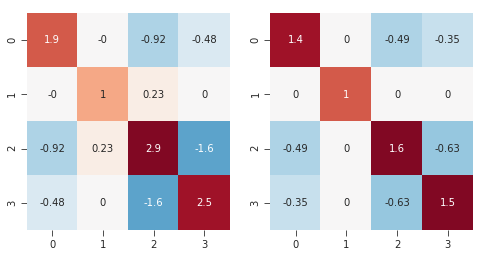

In [5]:
f, axes = plt.subplots(1, 2, figsize=[8, 4])
sns.heatmap(adj1, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False)
sns.heatmap(adj2, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False)

In [6]:
adj1 = markov_networks.gsmn(X, lamb=0.0)
adj2 = markov_networks.gsmn(X, lamb=0.5)

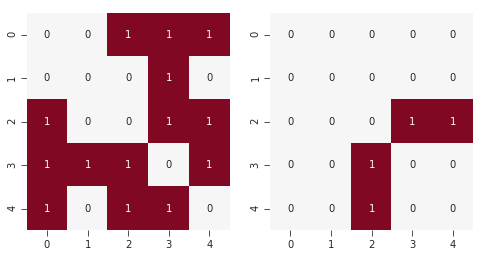

In [7]:
f, axes = plt.subplots(1, 2, figsize=[8, 4])
sns.heatmap(adj1, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False)
sns.heatmap(adj2, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False)

In [8]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=list(boston.feature_names))
df['target'] = boston.target
X = df.values

In [9]:
adj1 = markov_networks.select(X, method='glasso', rep_num=100, verbose=True)

[stars] lambda: 1000000.000000, instability: 0.000000
[stars] lambda: 1.000000, instability: 0.000000
[stars] lambda: 0.900000, instability: 0.003382
[stars] lambda: 0.800000, instability: 0.005527
[stars] lambda: 0.700000, instability: 0.033677
[stars] lambda: 0.600000, instability: 0.056215
[stars] lambda: 0.500000, instability: 0.070281


In [10]:
adj2 = markov_networks.select(X, method='skeptic', rep_num=100, verbose=True)

[stars] lambda: 1000000.000000, instability: 0.000000
[stars] lambda: 1.000000, instability: 0.000000
[stars] lambda: 0.900000, instability: 0.003442
[stars] lambda: 0.800000, instability: 0.020497
[stars] lambda: 0.700000, instability: 0.046949
[stars] lambda: 0.600000, instability: 0.058985
[stars] lambda: 0.500000, instability: 0.084754


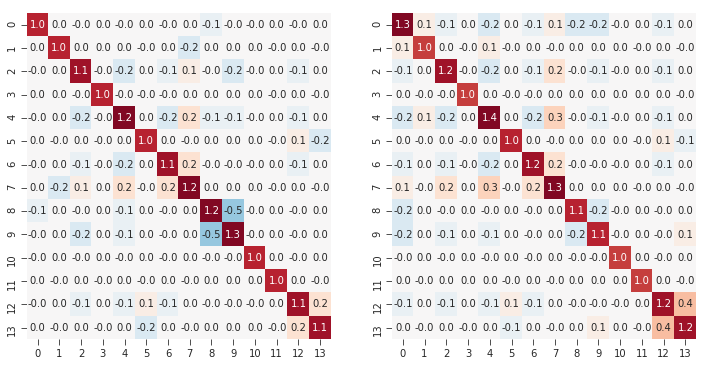

In [11]:
f, axes = plt.subplots(1, 2, figsize=[12, 6])
sns.heatmap(adj1, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False, fmt='.1f')
sns.heatmap(adj2, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False, fmt='.1f')

In [12]:
adj1 = markov_networks.gsmn(X, lamb=0.0)
adj2 = markov_networks.gsmn(X, lamb=0.5)

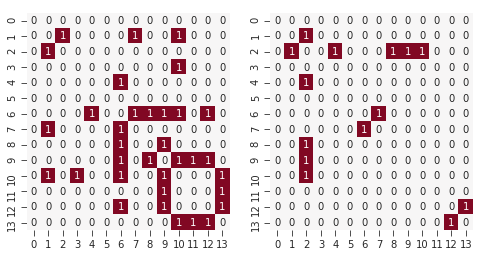

In [13]:
f, axes = plt.subplots(1, 2, figsize=[8, 4])
sns.heatmap(adj1, annot=True, ax=axes[0], center=0, cmap=palette, cbar=False)
sns.heatmap(adj2, annot=True, ax=axes[1], center=0, cmap=palette, cbar=False)

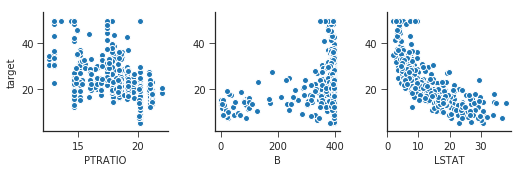

In [14]:
selected = adj1[-1, :-1]
sns.pairplot(df, x_vars=boston.feature_names[selected], y_vars='target')